In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# sklearn :: utils
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# sklearn :: models
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# sklearn :: evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

sns.set_style('whitegrid')



Problem definition

Apply regression models to predict Airbnb prices


Load the data

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print(df_train.shape, df_test.shape)

(51000, 29) (23111, 28)


In [3]:
print(df_train.columns)
df_train.head()

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,13662370,3.806662,House,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.5,Real Bed,strict,True,...,41.849684,-87.676270,Pilsen Arts Community Custom Home,Pilsen,17,97.0,https://a0.muscache.com/im/pictures/81318153/a...,60608,1.0,1.0
1,4765892,4.941642,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,2.0,Real Bed,strict,True,...,34.068613,-118.246455,Apartment 5 minutes from DTLA & Dodger Stadium,Echo Park,2,100.0,https://a0.muscache.com/im/pictures/aa00250e-0...,90012,1.0,1.0
2,21169968,4.941642,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.701958,-73.917352,"Brand New Huge 2bdr apartment(L,M train 2 min)",Bushwick,25,88.0,https://a0.muscache.com/im/pictures/d9220535-c...,11237,2.0,3.0
3,7939196,4.867534,Apartment,Entire home/apt,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",6,1.0,Real Bed,strict,True,...,40.742959,-73.990820,Grande Super Large APT !!!,Flatiron District,12,82.0,NaN,10010,1.0,3.0
4,18161036,3.663562,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,...,34.046473,-117.734095,Private Cozy and Clean Rooms in Pomona,NaN,2,100.0,https://a0.muscache.com/im/pictures/e0c9b2f9-a...,91766,1.0,1.0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 29 columns):
id                        51000 non-null int64
log_price                 51000 non-null float64
property_type             51000 non-null object
room_type                 51000 non-null object
amenities                 51000 non-null object
accommodates              51000 non-null int64
bathrooms                 50867 non-null float64
bed_type                  51000 non-null object
cancellation_policy       51000 non-null object
cleaning_fee              51000 non-null bool
city                      51000 non-null object
description               51000 non-null object
first_review              40144 non-null object
host_has_profile_pic      50873 non-null object
host_identity_verified    50873 non-null object
host_response_rate        38449 non-null object
host_since                50873 non-null object
instant_bookable          51000 non-null object
last_review               401

In [5]:
# check if there is missing values
df_train.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   133
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              10856
host_has_profile_pic        127
host_identity_verified      127
host_response_rate        12551
host_since                  127
instant_bookable              0
last_review               10826
latitude                      0
longitude                     0
name                          0
neighbourhood              4675
number_of_reviews             0
review_scores_rating      11450
thumbnail_url              5629
zipcode                     645
bedrooms                     63
beds                         85
dtype: int64

In [6]:
# I will delete all missing values from the following variables: bathrooms, bedrooms, beds
print(len(df_train))

df_train = df_train.dropna(subset=['bathrooms'])
df_train = df_train.dropna(subset=['bedrooms'])
df_train = df_train.dropna(subset=['beds'])

print(len(df_train))

51000
50771


In [7]:
# Different data types in the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50771 entries, 0 to 50999
Data columns (total 29 columns):
id                        50771 non-null int64
log_price                 50771 non-null float64
property_type             50771 non-null object
room_type                 50771 non-null object
amenities                 50771 non-null object
accommodates              50771 non-null int64
bathrooms                 50771 non-null float64
bed_type                  50771 non-null object
cancellation_policy       50771 non-null object
cleaning_fee              50771 non-null bool
city                      50771 non-null object
description               50771 non-null object
first_review              39964 non-null object
host_has_profile_pic      50645 non-null object
host_identity_verified    50645 non-null object
host_response_rate        38279 non-null object
host_since                50645 non-null object
instant_bookable          50771 non-null object
last_review               399

In [8]:
train_length = len(df_train)
print(train_length)
print(df_train.shape, df_test.shape)

df_dataset = pd.concat([df_train, df_test])
print(len(df_dataset))

50771
(50771, 29) (23111, 28)
73882


/home/leen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


The goal for the next few steps is to figure out how to choose the best features from the data.

Ideally, all the features should be encoded into a numerical value and without NAN

Let's explore each of these features individually

I'll go through each column iteratively and see how to preprocessing each column to get ready.

In [9]:
#amenities:

def clean_column(cell):
    
    cell_str = re.sub('["{}]','',cell)
    cell_list = cell_str.split(",")
    
    return cell_list
    
df_dataset['amenities_list'] = df_dataset['amenities'].apply(clean_column)

In [10]:
unique_amenities = []
for list in df_dataset['amenities_list']:
    for amenity in list:
        if amenity not in unique_amenities:
            unique_amenities.append(amenity)

print(unique_amenities)

['TV', 'Internet', 'Wireless Internet', 'Air conditioning', 'Kitchen', 'Gym', 'Breakfast', 'Indoor fireplace', 'Heating', 'Family/kid friendly', 'Suitable for events', 'Washer', 'Dryer', 'Smoke detector', 'Carbon monoxide detector', 'First aid kit', 'Safety card', 'Fire extinguisher', 'Essentials', 'Cable TV', 'Pets allowed', 'Shampoo', 'Lock on bedroom door', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'translation missing: en.hosting_amenity_50', 'Self Check-In', 'Lockbox', 'Hot water', 'Bed linens', 'Extra pillows and blankets', 'Elevator', 'Buzzer/wireless intercom', 'Free parking on premises', 'Hot tub', '24-hour check-in', 'Bathtub', 'Pool', 'Doorman', 'Refrigerator', 'Oven', 'Stove', 'Long term stays allowed', 'translation missing: en.hosting_amenity_49', 'Private entrance', 'Private living room', 'Pets live on this property', 'High chair', 'Babysitter recommendations', 'Room-darkening shades', 'Microwave', 'Coffee maker', 'Dishwasher', 'Elevator in building', 

In [11]:
import pandas
from sklearn.preprocessing import MultiLabelBinarizer


# Binarise labels
mlb = MultiLabelBinarizer()
expandedamenities = mlb.fit_transform(df_dataset["amenities_list"])
labelClasses = mlb.classes_


# Create a pandas.DataFrame from our output
expandedamenities = pd.DataFrame(expandedamenities, columns=labelClasses)
expandedamenities.head(10)

,,smooth pathway to front door,24-hour check-in,Accessible-height bed,Accessible-height toilet,Air conditioning,Air purifier,BBQ grill,Baby bath,Baby monitor,...,Wide clearance to bed,Wide clearance to shower & toilet,Wide clearance to shower and toilet,Wide doorway,Wide entryway,Wide hallway clearance,Window guards,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
5,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
expandedamenities.columns

Index(['', ' smooth pathway to front door', '24-hour check-in',
       'Accessible-height bed', 'Accessible-height toilet', 'Air conditioning',
       'Air purifier', 'BBQ grill', 'Baby bath', 'Baby monitor',
       ...
       'Wide clearance to bed', 'Wide clearance to shower & toilet',
       'Wide clearance to shower and toilet', 'Wide doorway', 'Wide entryway',
       'Wide hallway clearance', 'Window guards', 'Wireless Internet',
       'translation missing: en.hosting_amenity_49',
       'translation missing: en.hosting_amenity_50'],
      dtype='object', length=131)

In [13]:
expandedamenities.drop('', axis=1, inplace=True)

In [14]:
expandedamenities.drop(' smooth pathway to front door', axis=1, inplace=True)

In [15]:
expandedamenities.columns

Index(['24-hour check-in', 'Accessible-height bed', 'Accessible-height toilet',
       'Air conditioning', 'Air purifier', 'BBQ grill', 'Baby bath',
       'Baby monitor', 'Babysitter recommendations', 'Bath towel',
       ...
       'Wide clearance to bed', 'Wide clearance to shower & toilet',
       'Wide clearance to shower and toilet', 'Wide doorway', 'Wide entryway',
       'Wide hallway clearance', 'Window guards', 'Wireless Internet',
       'translation missing: en.hosting_amenity_49',
       'translation missing: en.hosting_amenity_50'],
      dtype='object', length=129)

In [16]:
df_dataset.reset_index(inplace=True, drop=True)
# I will concatenate the expandedamenities with the original data frame
df_dataset = pd.concat([df_dataset,expandedamenities], axis=1).fillna(0.0)
# then no need for the amenities column to avoid dublicatation
#df = df_dataset.loc[~df_dataset.index.duplicated(keep='first')]

In [17]:
df_dataset.dtypes

accommodates                                    int64
amenities                                      object
bathrooms                                     float64
bed_type                                       object
bedrooms                                      float64
beds                                          float64
cancellation_policy                            object
city                                           object
cleaning_fee                                     bool
description                                    object
first_review                                   object
host_has_profile_pic                           object
host_identity_verified                         object
host_response_rate                             object
host_since                                     object
id                                              int64
instant_bookable                               object
last_review                                    object
latitude                    

/home/leen/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


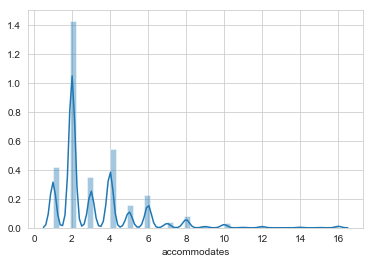

In [18]:
# accommodates:
sns.distplot(df_dataset.accommodates)

As there is no missing values in 'accommodates' and it is already int64; therefore, I can shift to figeur out the next feature.

In [19]:
# bathrooms:
df_dataset.bathrooms.value_counts()

1.0    58008
2.0     7935
1.5     3797
2.5     1567
3.0     1066
3.5      429
4.0      286
0.0      265
0.5      209
4.5      116
5.0       72
8.0       41
5.5       39
6.0       24
6.5       12
7.0       10
7.5        6
Name: bathrooms, dtype: int64

In [20]:
# bedrooms:
df_dataset.bedrooms.value_counts()

1.0     49631
2.0     11344
0.0      6741
3.0      4306
4.0      1329
5.0       355
6.0       106
7.0        38
8.0        14
10.0       10
9.0         8
Name: bedrooms, dtype: int64

# Start Building Machine Learning Models:

Now it a time to run a series of different machine learning algorithms over it to find which yield the best results.

In [21]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_dataset_numeric= df_dataset.select_dtypes(include=numerics)
df_dataset_numeric.head(30)

,accommodates,bathrooms,bedrooms,beds,id,latitude,log_price,longitude,number_of_reviews,review_scores_rating,...,Wide clearance to bed,Wide clearance to shower & toilet,Wide clearance to shower and toilet,Wide doorway,Wide entryway,Wide hallway clearance,Window guards,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,2,1.5,1.0,1.0,13662370,41.849684,3.806662,-87.676270,17,97.0,...,0,0,0,0,0,0,0,1,0,0
1,2,2.0,1.0,1.0,4765892,34.068613,4.941642,-118.246455,2,100.0,...,0,0,0,0,0,0,0,1,0,0
2,5,1.0,2.0,3.0,21169968,40.701958,4.941642,-73.917352,25,88.0,...,0,0,0,0,0,0,0,1,0,1
3,6,1.0,1.0,3.0,7939196,40.742959,4.867534,-73.990820,12,82.0,...,0,0,0,0,0,0,0,1,0,0
4,2,1.0,1.0,1.0,18161036,34.046473,3.663562,-117.734095,2,100.0,...,0,0,0,0,0,0,0,1,0,1
5,6,1.0,2.0,3.0,16078894,40.688232,4.836282,-73.933665,71,97.0,...,0,0,0,0,0,0,0,1,0,0
6,5,2.0,2.0,1.0,10122015,42.330227,5.220356,-71.111333,0,0.0,...,0,0,0,0,0,0,0,1,0,0
7,2,1.0,1.0,1.0,13762269,33.898962,5.686975,-118.417798,4,95.0,...,0,0,0,0,0,0,0,1,1,1
8,2,1.0,1.0,1.0,15174230,40.636796,3.555348,-73.968571,6,83.0,...,0,0,0,0,0,0,0,1,0,0
9,2,2.0,4.0,1.0,15716280,40.741946,4.234107,-73.978256,7,94.0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
df_dataset.describe()

,accommodates,bathrooms,bedrooms,beds,id,latitude,log_price,longitude,number_of_reviews,review_scores_rating,...,Wide clearance to bed,Wide clearance to shower & toilet,Wide clearance to shower and toilet,Wide doorway,Wide entryway,Wide hallway clearance,Window guards,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
count,73882.000000,73882.000000,73882.000000,73882.000000,7.388200e+04,73882.000000,73882.000000,73882.000000,73882.000000,73882.000000,...,73882.000000,73882.000000,73882.000000,73882.000000,73882.000000,73882.000000,73882.000000,73882.000000,73882.000000,73882.000000
mean,3.158239,1.234408,1.265721,1.710850,1.126493e+07,38.445861,3.284377,-92.402305,20.888403,72.846119,...,0.005482,0.001651,0.000014,0.007580,0.004074,0.006402,0.008297,0.961885,0.275926,0.341734
std,2.154767,0.583276,0.853023,1.255321,6.082090e+06,3.080282,2.293895,21.705542,37.807768,39.922970,...,0.073836,0.040603,0.003679,0.086731,0.063699,0.079757,0.090710,0.191475,0.446983,0.474294
min,1.000000,0.000000,0.000000,0.000000,3.440000e+02,33.338905,0.000000,-122.511500,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,6.261297e+06,34.127908,0.000000,-118.342477,1.000000,80.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000,1.225318e+07,40.662059,4.317488,-76.997124,6.000000,94.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,4.000000,1.000000,1.000000,2.000000,1.640216e+07,40.746110,5.003946,-73.954661,23.000000,99.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,16.000000,8.000000,10.000000,18.000000,2.123090e+07,42.390437,7.600402,-70.985047,605.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Engineering:

In [23]:
#Label Encode all continuous values using LabelEncoder()
df_dataset_numeric_enc = df_dataset_numeric.apply(LabelEncoder().fit_transform)

df_dataset_numeric_enc.head(20)
print(df_dataset_numeric_enc.columns)

Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'id', 'latitude',
       'log_price', 'longitude', 'number_of_reviews', 'review_scores_rating',
       ...
       'Wide clearance to bed', 'Wide clearance to shower & toilet',
       'Wide clearance to shower and toilet', 'Wide doorway', 'Wide entryway',
       'Wide hallway clearance', 'Window guards', 'Wireless Internet',
       'translation missing: en.hosting_amenity_49',
       'translation missing: en.hosting_amenity_50'],
      dtype='object', length=139)


In [24]:
df_train = df_dataset.iloc[:train_length]
df_test = df_dataset.iloc[train_length:]
print(df_train.shape, df_test.shape)
df_test['log_price']

(50771, 159) (23111, 159)


50771    0.0
50772    0.0
50773    0.0
50774    0.0
50775    0.0
50776    0.0
50777    0.0
50778    0.0
50779    0.0
50780    0.0
50781    0.0
50782    0.0
50783    0.0
50784    0.0
50785    0.0
50786    0.0
50787    0.0
50788    0.0
50789    0.0
50790    0.0
50791    0.0
50792    0.0
50793    0.0
50794    0.0
50795    0.0
50796    0.0
50797    0.0
50798    0.0
50799    0.0
50800    0.0
        ... 
73852    0.0
73853    0.0
73854    0.0
73855    0.0
73856    0.0
73857    0.0
73858    0.0
73859    0.0
73860    0.0
73861    0.0
73862    0.0
73863    0.0
73864    0.0
73865    0.0
73866    0.0
73867    0.0
73868    0.0
73869    0.0
73870    0.0
73871    0.0
73872    0.0
73873    0.0
73874    0.0
73875    0.0
73876    0.0
73877    0.0
73878    0.0
73879    0.0
73880    0.0
73881    0.0
Name: log_price, Length: 23111, dtype: float64

In [25]:
X_columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'latitude', 'longitude', 'number_of_reviews', 'review_scores_rating', 'Gym', 'Wide entryway', 'Window guards', 'Wireless Internet']
y_column = ['log_price']

In [26]:
threshold = 0.8
X = df_train[X_columns]
y = df_train[y_column]
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=1.0-threshold, shuffle=True)

                                                                         
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (40616, 12)
y_train (40616, 1)
X_test (10155, 12)
y_test (10155, 1)


In [27]:
# Linear Regression
# Model Training
model = LinearRegression()
#model.fit(X_train, y_train.ravel())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

MAE 0.44
RMSE 0.57


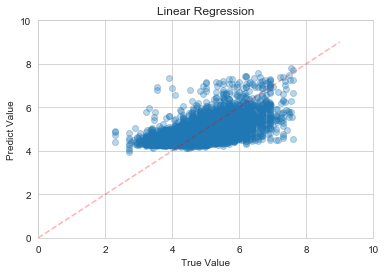

In [28]:
# Model Evaluation

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('MAE', round(mae, 2))
print('RMSE', round(rmse, 2))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot(range(0,10), range(0,10), '--r', alpha=0.3, label='Line1')
plt.title('Linear Regression')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.show()

KNN

In [29]:
# Model Training
model = KNeighborsRegressor(n_neighbors=20)
#model.fit(X_train, y_train.ravel())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


def evaluation_chart(test, pred, title):
    plt.scatter(test, pred, alpha=0.3)
    plt.plot(range(0,10), range(0,10), '--r', alpha=0.3, label='Line1')
    plt.title(title)
    plt.xlabel('True Value')
    plt.ylabel('Predict Value')
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    plt.show()

MAE 0.4
RMSE 0.51


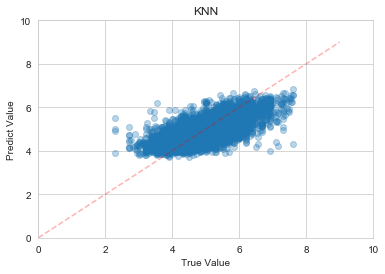

In [30]:
# model evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('MAE', round(mae, 2))
print('RMSE', round(rmse, 2))
evaluation_chart(y_test, y_pred, 'KNN')

Decision Tree

In [31]:
def model_training(model, X_train, y_train, X_test):
    model.fit(X_train, y_train.ravel())
    y_pred = model.predict(X_test)
    return(y_pred)

def model_evaluation(title, model, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('MAE', round(mae, 2))
    print('RMSE', round(rmse, 2))
    for i in range(len(X_columns)):
        print([X_columns[i], model.feature_importances_[i]])
    evaluation_chart(y_test, y_pred, title)

def run_experiment(title, model, X_train, y_train, X_test, y_test):
    y_pred = model_training(model, X_train, y_train, X_test)
    model_evaluation(title, model, y_test, y_pred)

MAE 0.44
RMSE 0.59
['accommodates', 0.10179248120408732]
['bathrooms', 0.06609177124045008]
['bedrooms', 0.2840854233111934]
['beds', 0.018963639355921057]
['latitude', 0.20559959521910792]
['longitude', 0.21595729190261984]
['number_of_reviews', 0.05584448898278231]
['review_scores_rating', 0.035372470663664696]
['Gym', 0.009222751490482323]
['Wide entryway', 0.00036771804807068757]
['Window guards', 0.0007131002318925996]
['Wireless Internet', 0.0059892683497277215]


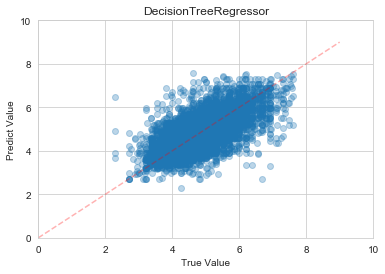

In [32]:
run_experiment('DecisionTreeRegressor', DecisionTreeRegressor(), X_train, y_train, X_test, y_test)

Random Forest

MAE 0.34
RMSE 0.46
['accommodates', 0.10102748914052193]
['bathrooms', 0.06558776410782528]
['bedrooms', 0.28465930202378603]
['beds', 0.0180074244479114]
['latitude', 0.2056359850263989]
['longitude', 0.21600602983294515]
['number_of_reviews', 0.05634248644678719]
['review_scores_rating', 0.035736494561576834]
['Gym', 0.009974598733993947]
['Wide entryway', 0.000329712959421823]
['Window guards', 0.0007101441647242004]
['Wireless Internet', 0.005982568554107332]


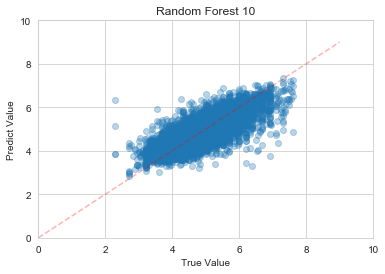

In [33]:
run_experiment('Random Forest 10', RandomForestRegressor(n_estimators=10), X_train, y_train, X_test, y_test)

MAE 0.32
RMSE 0.44
['accommodates', 0.10949077770081535]
['bathrooms', 0.06683596963520795]
['bedrooms', 0.2798845878640033]
['beds', 0.01827340991733891]
['latitude', 0.20624823513725488]
['longitude', 0.2108273680156703]
['number_of_reviews', 0.05603535791734756]
['review_scores_rating', 0.03522070115715899]
['Gym', 0.010037517922502308]
['Wide entryway', 0.00030196966787857614]
['Window guards', 0.0006567659599842945]
['Wireless Internet', 0.006187339104837553]


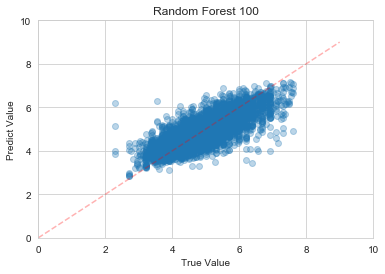

In [34]:
run_experiment('Random Forest 100', RandomForestRegressor(n_estimators=100), X_train, y_train, X_test, y_test)

In [35]:
def model_training(model, X_train, y_train, X_test):
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    return(y_pred)

def model_evaluation(title, model, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(title)
    print('MAE', round(mae, 2))
    print('RMSE', round(rmse, 2))
    evaluation_chart(y_test, y_pred, title)
    importance = []
    if hasattr(model, 'feature_importances_'):
        print('Feature Importance')
        importance = []
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.feature_importances_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head(10))
    return(mae, rmse)

def run_experiment(title, model, X_train, y_train, X_test, y_test):
    y_pred = model_training(model, X_train, y_train, X_test)
    mae, rmse = model_evaluation(title, model, y_test, y_pred)
    return(mae, rmse)

In [36]:
models = [
    ('LinearRegression', LinearRegression()),
    ('RandomForestRegressor10', RandomForestRegressor(n_estimators=10)),
    ('RandomForestRegressor100', RandomForestRegressor(n_estimators=100)),
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor()),
]
results = []
for m in models:
    mae, rmse = run_experiment(m[0], m[1], X_train, y_train, X_test, y_test)
    results.append([m[0], mae, rmse])
    
# sort the results and print as a table
df_results = pd.DataFrame(results)
df_results.columns = ['model', 'mae', 'rmse']
df_results = df_results.sort_values(by='mae')
df_results

AttributeError: 'numpy.ndarray' object has no attribute 'values'

Model Training / Evaluation - Cross Validation

In [37]:
models = [
    ('LinearRegression', LinearRegression()),
    ('RandomForestRegressor10', RandomForestRegressor(n_estimators=10)),
    ('RandomForestRegressor100', RandomForestRegressor(n_estimators=100, n_jobs=4)),
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor())
]

k = 10
results = {}
for m in models:
    print('MODEL', m[0])
    results[m[0]] = {'mae':[], 'rmse':[]}
    kf = KFold(n_splits=k)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        model = m[1]
        model.fit(X_train, y_train.ravel())
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        results[m[0]]['mae'].append(mae)
        results[m[0]]['rmse'].append(rmse)

MODEL LinearRegression
MODEL RandomForestRegressor10
MODEL RandomForestRegressor100
MODEL KNeighborsRegressor
MODEL DecisionTreeRegressor


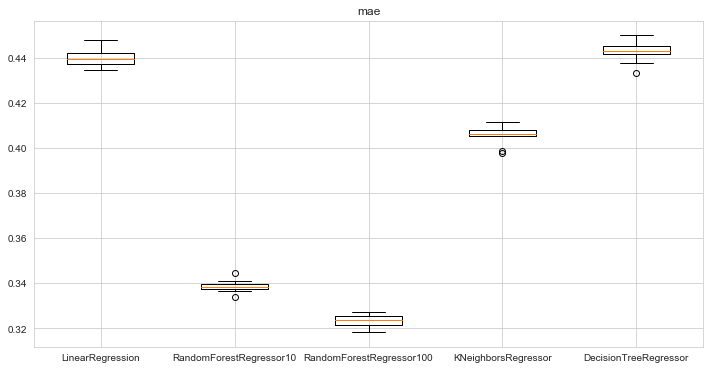

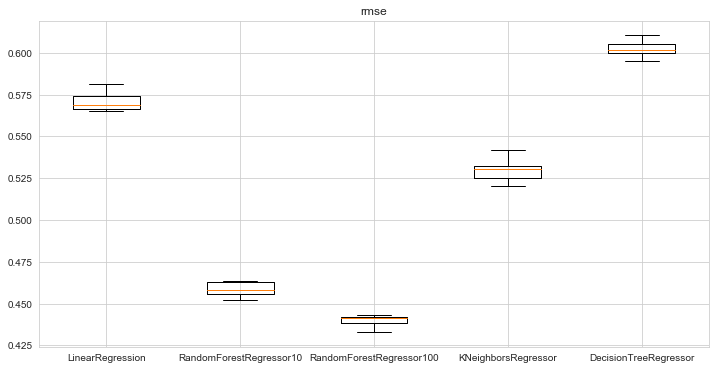

In [38]:
for metric in ['mae', 'rmse']:
    values = []
    labels = []
    for model, result_values in results.items():
        for m, v in result_values.items():
            if m == metric:
                labels.append(model)
                values.append(v)
    plt.figure(figsize=(12,6))
    plt.title(metric)
    plt.boxplot(values)
    plt.xticks(range(1, len(labels)+1), labels, rotation='horizontal')
    plt.show()


Prepare submission

In [39]:
#P=df_test.drop(labels=['property_type','room_type','bed_type','cancellation_policy','cleaning_fee','city','description','first_review','host_has_profile_pic','host_identity_verified','host_response_rate','host_since','instant_bookable','last_review','name','neighbourhood','review_scores_rating','thumbnail_url','zipcode'],axis=1)
#P=#df_test.drop(labels=['Bath towel', 'Body soap', 'Hand or paper towel', 'Hand soap', 'Toilet paper', 'id', 'translation missing: en.hosting_amenity_49', 'translation missing: en.hosting_amenity_50'],axis=1)
# df_prediction = df_test[X_columns].fillna(0.0)
# df_test['log_price'] = model.predict(df_prediction)
# df_test[['id', 'log_price']]

df_prediction = df_test[X_columns].fillna(0.0)
df_test['log_price'] = model.predict(df_prediction)
df_test[['id', 'log_price']]

AttributeError: 'str' object has no attribute 'predict'

In [ ]:
df_test[['id', 'log_price']].to_csv('Kaggle competition regression.csv', index=False)